In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from rdkit.Chem import PandasTools
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit import rdBase
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit.Chem import rdFingerprintGenerator
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys
from rdkit.Chem.Fingerprints import FingerprintMols
from descriptastorus.descriptors.DescriptorGenerator import MakeGenerator
# Importing Libraries
import pandas as pd
import warnings
import os

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors

warnings.filterwarnings("ignore")
     

In [3]:
df = pd.read_csv('data/raw_data/level_one_unifi_with_smiles.csv')
# Cannozilation
df = df[df['smiles'].notna() & (df['smiles'] != '')].reset_index(drop=True)

def canonicalize_smiles(smi):
    try:
        mol = Chem.MolFromSmiles(smi)
        if mol is not None:
            return Chem.MolToSmiles(mol)
        else:
            return None
    except:
        return None

df['smiles'] = df['smiles'].apply(canonicalize_smiles)

mol_list = []

for smile in df['smiles']:
  mol = Chem.MolFromSmiles(smile)

  mol = Chem.AddHs(mol)
  mol_list.append(mol)

df = pd.concat([df, pd.DataFrame(mol_list, columns = (['mol']))], axis=1)
first_instances = df.groupby('Molecule_Name').first().reset_index()
mean_rt = df.groupby('Molecule_Name')['Observed RT (min)'].mean()
first_instances['Observed RT (min)'] = first_instances['Molecule_Name'].map(mean_rt)
df = first_instances

df.shape

(185, 9)

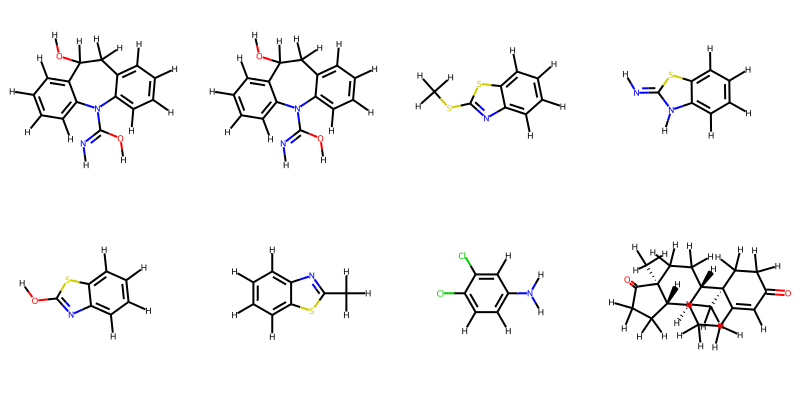

In [4]:
Draw.MolsToGridImage(df['mol'][:8],molsPerRow=4,subImgSize=(200,200))

# Compute descriptors

## RDKIT 2D

In [5]:
Desc_list_func = MoleculeDescriptors.MolecularDescriptorCalculator(x[0] for x in Descriptors._descList)
names = Desc_list_func.GetDescriptorNames()
Des_func = MoleculeDescriptors.MolecularDescriptorCalculator(x[0] for x in Descriptors._descList)
des = []

for mol in df['mol']:
  des.append(Des_func.CalcDescriptors(mol))
id_target = df[['Molecule_Name', 'Observed RT (min)']].copy()
id_target = id_target.rename(columns={'Observed RT (min)': 'RT'})
rdkit_df = pd.concat([id_target, pd.DataFrame(des, columns=(x[0] for x in Descriptors._descList))], axis=1)


In [6]:
rdkit_df

,Molecule_Name,RT,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,"10,11-Dihydro-10-hydroxycarbamazepine",6.7610,8.679363,-3.335958,8.679363,0.424120,0.499922,254.289,240.177,254.105528,...,0,0,0,0,0,0,0,0,0,0
1,10-Hydroxycarbamazepine,6.7890,8.679363,-3.335958,8.679363,0.424120,0.499922,254.289,240.177,254.105528,...,0,0,0,0,0,0,0,0,0,0
2,2-(methylthio)benzothiazole,11.6830,7.699818,-2.244200,7.699818,0.122917,0.627153,181.285,174.229,181.001991,...,1,0,0,0,0,1,0,0,0,0
3,2-aminobenzothiazole,3.4240,7.630880,-0.381638,7.630880,0.015741,0.573650,150.206,144.158,150.025169,...,0,0,0,0,0,1,0,0,0,0
4,2-hydroxybenzothiazole,6.9395,7.576991,-0.324694,7.576991,0.011111,0.624312,151.190,146.150,151.009185,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,Tylosin,9.5530,16.116937,-7.966037,16.116937,2.333030,0.130887,916.112,838.496,915.519150,...,0,0,0,0,0,0,0,0,0,0
181,Venlafaxine N-oxide,7.8465,14.185790,-5.446086,14.185790,1.524370,0.670350,293.407,266.191,293.199094,...,0,0,0,0,0,0,0,0,0,0
182,tramadol,5.8380,9.310535,-4.910182,9.310535,1.128964,0.905703,263.381,238.181,263.188529,...,0,0,0,0,0,0,0,0,0,0
183,tramadol N-oxide,6.1820,13.937961,-5.324222,13.937961,1.425432,0.680366,279.380,254.180,279.183444,...,0,0,0,0,0,0,0,0,0,0


## ECFP6

In [7]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
from tqdm import tqdm  # Pour voir la progression

def compute_ecfp(df, radius=3, nBits=1024, column='mol'):
    """
    Calcule les ECFP pour chaque molécule du DataFrame
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame contenant les molécules
    radius : int (default=3)
        Rayon pour ECFP (3 pour ECFP6)
    nBits : int (default=1024)
        Nombre de bits pour le fingerprint
    column : str (default='mol')
        Nom de la colonne contenant les molécules RDKit
        
    Returns:
    --------
    pandas DataFrame
        DataFrame contenant les bits ECFP
    """
    # Calculer les fingerprints
    print("Calcul des ECFP6...")
    fps = []
    for mol in tqdm(df[column]):
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=nBits)
        fps.append(np.array(fp))
    
    # Convertir en DataFrame
    fp_bits = pd.DataFrame(fps, columns=[f'Bit_{i}' for i in range(nBits)])
    
    print(f"\nNombre de bits calculés : {nBits}")
    print(f"Nombre de molécules traitées : {len(fps)}")
    
    return fp_bits

# Calculer les ECFP6
ecfp_df = compute_ecfp(df)

# Créer le DataFrame final avec les identifiants et les ECFP6
ecfp_final_df = pd.concat([
    id_target[['Molecule_Name', 'RT']],  # Garder les colonnes d'identification
    ecfp_df
], axis=1)

Calcul des ECFP6...


100%|██████████| 185/185 [00:00<00:00, 956.73it/s]



Nombre de bits calculés : 1024
Nombre de molécules traitées : 185


In [8]:
ecfp_final_df

,Molecule_Name,RT,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,...,Bit_1014,Bit_1015,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023
0,"10,11-Dihydro-10-hydroxycarbamazepine",6.7610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10-Hydroxycarbamazepine,6.7890,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2-(methylthio)benzothiazole,11.6830,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2-aminobenzothiazole,3.4240,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2-hydroxybenzothiazole,6.9395,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,Tylosin,9.5530,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
181,Venlafaxine N-oxide,7.8465,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182,tramadol,5.8380,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
183,tramadol N-oxide,6.1820,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## MACCSkeys

In [9]:
from rdkit.Chem import MACCSkeys
from tqdm import tqdm

def compute_maccs(df, column='mol'):
    """
    Calcule les clés MACCS pour chaque molécule du DataFrame
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame contenant les molécules
    column : str (default='mol')
        Nom de la colonne contenant les molécules RDKit
        
    Returns:
    --------
    pandas DataFrame
        DataFrame contenant les clés MACCS (167 bits)
    """
    print("Calcul des clés MACCS...")
    maccs_list = []
    for mol in tqdm(df[column]):
        maccs = MACCSkeys.GenMACCSKeys(mol)
        maccs_list.append(np.array(maccs))
    
    # Convertir en DataFrame avec noms appropriés
    maccs_df = pd.DataFrame(maccs_list, columns=[f'MACCS_{i}' for i in range(167)])
    
    print(f"\nNombre de bits MACCS : 167")
    print(f"Nombre de molécules traitées : {len(maccs_list)}")
    
    return maccs_df

# Calculer les clés MACCS
maccs_df = compute_maccs(df)

# Créer le DataFrame final avec les identifiants et les clés MACCS
maccs_final_df = pd.concat([
    id_target[['Molecule_Name', 'RT']],  # Garder les colonnes d'identification
    maccs_df
], axis=1)

Calcul des clés MACCS...


100%|██████████| 185/185 [00:00<00:00, 746.85it/s]


Nombre de bits MACCS : 167
Nombre de molécules traitées : 185


In [10]:
maccs_final_df

,Molecule_Name,RT,MACCS_0,MACCS_1,MACCS_2,MACCS_3,MACCS_4,MACCS_5,MACCS_6,MACCS_7,...,MACCS_157,MACCS_158,MACCS_159,MACCS_160,MACCS_161,MACCS_162,MACCS_163,MACCS_164,MACCS_165,MACCS_166
0,"10,11-Dihydro-10-hydroxycarbamazepine",6.7610,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
1,10-Hydroxycarbamazepine,6.7890,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
2,2-(methylthio)benzothiazole,11.6830,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,1,0
3,2-aminobenzothiazole,3.4240,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,1,0
4,2-hydroxybenzothiazole,6.9395,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,Tylosin,9.5530,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,1,1,0
181,Venlafaxine N-oxide,7.8465,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
182,tramadol,5.8380,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
183,tramadol N-oxide,6.1820,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


## Molecular Quantum Number

In [11]:
from rdkit.Chem import rdMolDescriptors
from tqdm import tqdm

def compute_mqn(df, column='mol'):
    """
    Calcule les Molecular Quantum Numbers pour chaque molécule du DataFrame
    """
    print("Calcul des Molecular Quantum Numbers...")
    mqn_list = []
    for mol in tqdm(df[column]):
        mqn = rdMolDescriptors.MQNs_(mol)
        mqn_list.append(mqn)
    
    # Convertir en DataFrame
    mqn_df = pd.DataFrame(mqn_list, columns=[f'MQN_{i+1}' for i in range(42)])
    
    print(f"\nNombre de descripteurs MQN : 42")
    print(f"Nombre de molécules traitées : {len(mqn_list)}")
    
    return mqn_df

# Calculer les MQN
mqn_df = compute_mqn(df)

# Créer le DataFrame final
mqn_final_df = pd.concat([
    id_target[['Molecule_Name', 'RT']],
    mqn_df
], axis=1)

Calcul des Molecular Quantum Numbers...


100%|██████████| 185/185 [00:00<00:00, 8586.33it/s]


Nombre de descripteurs MQN : 42
Nombre de molécules traitées : 185


In [12]:
mqn_final_df

,Molecule_Name,RT,MQN_1,MQN_2,MQN_3,MQN_4,MQN_5,MQN_6,MQN_7,MQN_8,...,MQN_33,MQN_34,MQN_35,MQN_36,MQN_37,MQN_38,MQN_39,MQN_40,MQN_41,MQN_42
0,"10,11-Dihydro-10-hydroxycarbamazepine",6.7610,15,0,0,0,0,0,0,1,...,0,0,0,2,1,0,0,0,4,2
1,10-Hydroxycarbamazepine,6.7890,15,0,0,0,0,0,0,1,...,0,0,0,2,1,0,0,0,4,2
2,2-(methylthio)benzothiazole,11.6830,8,0,0,0,0,2,0,0,...,0,0,1,1,0,0,0,0,2,1
3,2-aminobenzothiazole,3.4240,7,0,0,0,0,1,0,1,...,0,0,1,1,0,0,0,0,2,1
4,2-hydroxybenzothiazole,6.9395,7,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,Tylosin,9.5530,46,0,0,0,0,0,0,1,...,0,0,0,3,0,0,0,1,0,0
181,Venlafaxine N-oxide,7.8465,17,0,0,0,0,0,0,1,...,0,0,0,2,0,0,0,0,0,0
182,tramadol,5.8380,16,0,0,0,0,0,0,1,...,0,0,0,2,0,0,0,0,0,0
183,tramadol N-oxide,6.1820,16,0,0,0,0,0,0,1,...,0,0,0,2,0,0,0,0,0,0


## Mordred 2D/3D

In [13]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw, PandasTools, AllChem
import mordred
from mordred import Calculator, descriptors
import pandas as pd
from tqdm import tqdm

def generate_3d_coordinates(mol):
    """
    Génère les coordonnées 3D pour une molécule
    """
    try:
        mol = Chem.AddHs(mol)  # Ajouter des hydrogènes explicites
        AllChem.EmbedMolecule(mol, randomSeed=42)  # Générer coordonnées 3D
        AllChem.MMFFOptimizeMolecule(mol)  # Optimiser la géométrie
        return mol
    except:
        return None

def calculate_mordred_descriptors(df, mol_column='mol'):
    """
    Calcule tous les descripteurs Mordred avec coordonnées 3D
    """
    # Initialiser le calculateur Mordred
    calc = Calculator(descriptors, ignore_3D=False)
    
    print("Génération des coordonnées 3D et calcul des descripteurs...")
    descriptors_list = []
    
    for mol in tqdm(df[mol_column]):
        try:
            # Générer coordonnées 3D
            mol_3d = generate_3d_coordinates(mol)
            if mol_3d is not None:
                # Calculer descripteurs
                result = calc(mol_3d)
                descriptors_list.append({str(key): value for key, value in result.items()})
            else:
                # Si la génération 3D échoue
                empty_desc = {str(key): None for key in calc.descriptors}
                descriptors_list.append(empty_desc)
        except:
            # En cas d'erreur
            empty_desc = {str(key): None for key in calc.descriptors}
            descriptors_list.append(empty_desc)
    
    # Créer DataFrame avec les descripteurs
    mordred_df = pd.DataFrame(descriptors_list)
    
    # Convertir en numérique quand possible
    mordred_df = mordred_df.apply(pd.to_numeric, errors='coerce')
    
    return mordred_df

# Calculer les descripteurs
mordred_df = calculate_mordred_descriptors(df)

# Créer le DataFrame final
final_df = pd.concat([
    id_target[['Molecule_Name', 'RT']],
    mordred_df
], axis=1)

print("\nStatistiques des descripteurs:")
print(f"Nombre total de descripteurs: {mordred_df.shape[1]}")
print(f"Nombre de molécules traitées: {len(final_df)}")
print("\nPourcentage de valeurs manquantes par descripteur:")
print((final_df.isna().sum() / len(final_df) * 100).describe())



Génération des coordonnées 3D et calcul des descripteurs...


100%|██████████| 185/185 [01:37<00:00,  1.89it/s]



Statistiques des descripteurs:
Nombre total de descripteurs: 1826
Nombre de molécules traitées: 185

Pourcentage de valeurs manquantes par descripteur:
count    1828.00000
mean        9.81223
std        27.60161
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max       100.00000
dtype: float64


In [14]:
final_df = final_df.fillna(final_df.median())
# Identifier les colonnes avec trop de NaN (par exemple plus de 50% de NaN)
nan_ratio = final_df.isna().sum() / len(final_df)
columns_to_drop = nan_ratio[nan_ratio > 0.5].index

# Supprimer ces colonnes
final_df = final_df.drop(columns=columns_to_drop)

# Remplacement des valeurs infinies par NaN
final_df = final_df.replace([np.inf, -np.inf], np.nan)

# Remplacement des NaN par la médiane pour chaque colonne
final_df = final_df.fillna(final_df.median())
twod_and_3D_final_df = final_df



In [15]:
twod_and_3D_final_df

,Molecule_Name,RT,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,"10,11-Dihydro-10-hydroxycarbamazepine",6.7610,14.934771,12.561758,0,2,24.691841,2.484579,4.883682,24.691841,...,9.970819,60.909345,254.105528,7.700168,593,36,102.0,123.0,6.027778,4.166667
1,10-Hydroxycarbamazepine,6.7890,14.934771,12.561758,0,2,24.691841,2.484579,4.883682,24.691841,...,9.970819,60.909345,254.105528,7.700168,593,36,102.0,123.0,6.027778,4.166667
2,2-(methylthio)benzothiazole,11.6830,8.444841,7.709470,0,0,14.603270,2.375073,4.568600,14.603270,...,9.155356,55.319704,181.001991,10.055666,147,13,56.0,65.0,3.083333,2.527778
3,2-aminobenzothiazole,3.4240,7.847124,7.174621,0,2,13.043049,2.363609,4.557136,13.043049,...,9.085117,53.938362,150.025169,9.376573,108,11,52.0,60.0,2.833333,2.194444
4,2-hydroxybenzothiazole,6.9395,7.847124,7.174621,0,0,13.043049,2.363609,4.557136,13.043049,...,9.085117,53.938362,151.009185,10.067279,108,11,52.0,60.0,2.833333,2.194444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,Tylosin,9.5530,48.557238,36.703727,0,1,78.456289,2.480740,4.961480,78.456289,...,11.094907,103.473397,915.519150,6.493044,19310,117,328.0,387.0,27.479167,14.291667
181,Venlafaxine N-oxide,7.8465,16.089974,13.947243,0,1,25.767002,2.445395,4.890790,25.767002,...,9.986679,54.956990,293.199094,6.108314,890,31,108.0,123.0,8.208333,4.569444
182,tramadol,5.8380,14.348985,12.477357,0,1,23.675413,2.407701,4.815402,23.675413,...,9.749229,52.063656,263.188529,5.981557,682,28,94.0,108.0,6.916667,4.333333
183,tramadol N-oxide,6.1820,15.314068,13.289622,0,1,24.238382,2.418611,4.837221,24.238382,...,9.873698,53.562167,279.183444,6.204077,778,29,102.0,116.0,7.868056,4.375000


## Combined df

In [16]:
# Fusionner les DataFrames sur 'Molecule_Name' et 'RT'
all_df = rdkit_df.merge(ecfp_final_df, on=['Molecule_Name', 'RT'], how='outer') \
                 .merge(maccs_final_df, on=['Molecule_Name', 'RT'], how='outer') \
                 .merge(mqn_final_df, on=['Molecule_Name', 'RT'], how='outer') \
                 .merge(twod_and_3D_final_df, on=['Molecule_Name', 'RT'], how='outer')


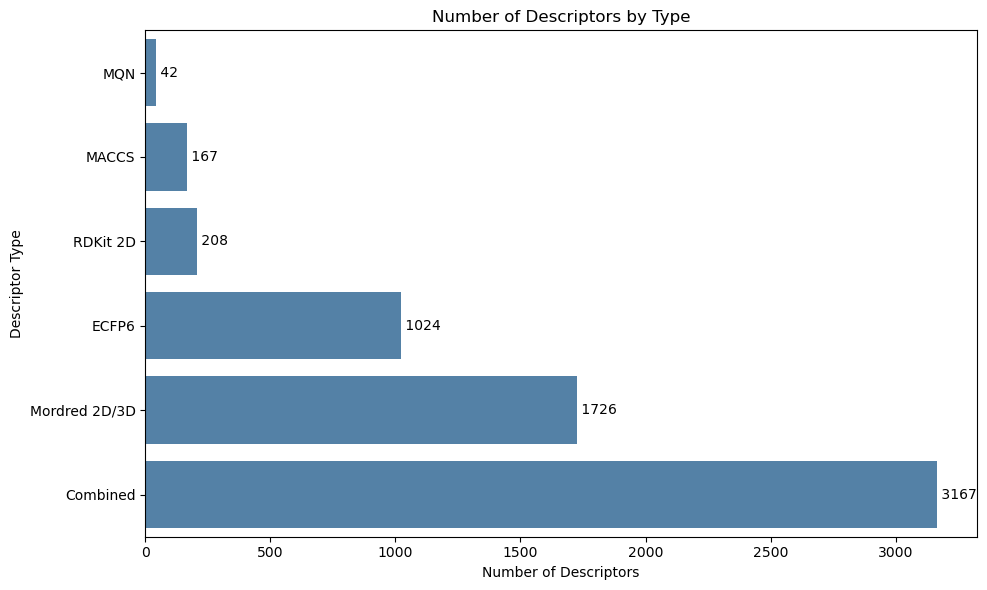

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Calculer le nombre de descripteurs pour chaque type
n_descriptors = {
   'RDKit 2D': rdkit_df.shape[1] - 2,  # -2 pour Molecule_Name et RT
   'ECFP6': ecfp_final_df.shape[1] - 2,
   'MACCS': maccs_final_df.shape[1] - 2,
   'MQN': mqn_final_df.shape[1] - 2,
   'Mordred 2D/3D': twod_and_3D_final_df.shape[1] - 2,
   'Combined': all_df.shape[1] - 2
}

# Créer le DataFrame pour le plot
plot_df = pd.DataFrame.from_dict(n_descriptors, orient='index', columns=['Count'])
plot_df = plot_df.sort_values('Count')

# Créer le barplot horizontal
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Count', y=plot_df.index, data=plot_df, color='steelblue', orient='h')

# Personnalisation
plt.title('Number of Descriptors by Type')
plt.xlabel('Number of Descriptors')
plt.ylabel('Descriptor Type')

# Ajouter les valeurs sur les barres
for i, v in enumerate(plot_df['Count']):
   ax.text(v, i, f' {v}', va='center')

# Créer le dossier 'figure' s'il n'existe pas
os.makedirs('figure', exist_ok=True)

# Sauvegarder le graphique dans le dossier 'figure'
output_path = 'figures/number_of_descriptors_by_type_plot.png'
plt.tight_layout()
plt.savefig(output_path)

# Afficher le graphique
plt.show()


<Figure size 1200x600 with 0 Axes>

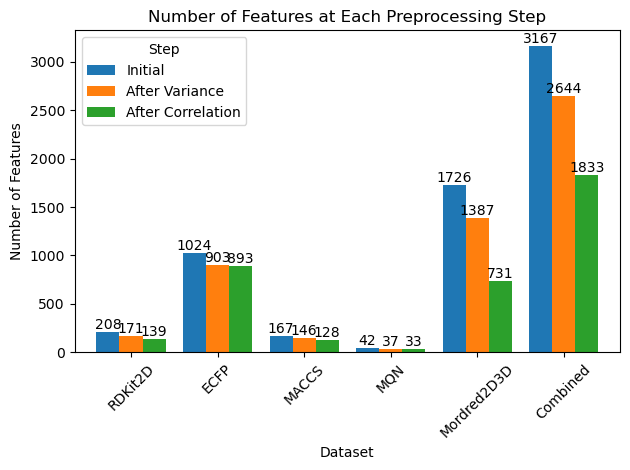


Preprocessing statistics:
       Dataset  Initial  After Variance  After Correlation
0      RDKit2D      208             171                139
1         ECFP     1024             903                893
2        MACCS      167             146                128
3          MQN       42              37                 33
4  Mordred2D3D     1726            1387                731
5     Combined     3167            2644               1833


In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Créer le dossier figures s'il n'existe pas
os.makedirs('figures', exist_ok=True)

def remove_correlated_features(X, threshold=0.95):
   """Supprime les features hautement corrélées"""
   corr_matrix = X.corr().abs()
   upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
   to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
   return X.drop(columns=to_drop)

def plot_preprocessing_steps(datasets):
    """Plot le nombre de features après chaque étape de préprocessing"""
    preprocessing_stats = []
    
    for name, df in datasets.items():
        # Initial features
        initial = df.drop(['Molecule_Name', 'RT'], axis=1).shape[1]
        
        # After variance threshold
        X = df.drop(['Molecule_Name', 'RT'], axis=1)
        selector = VarianceThreshold(threshold=0.01)
        X_var = selector.fit_transform(X)
        after_var = X_var.shape[1]
        
        # After correlation removal
        X_var_df = pd.DataFrame(X_var, columns=X.columns[selector.get_support()])
        X_corr_removed = remove_correlated_features(X_var_df)
        after_corr = X_corr_removed.shape[1]
        
        # Remplacement du DataFrame original
        processed_df = pd.concat([df[['Molecule_Name', 'RT']].reset_index(drop=True), 
                                X_corr_removed], axis=1)
        datasets[name] = processed_df
        
        # Sauvegarder la version prétraitée
        processed_df.to_parquet(f'data/data_descriptors/{name.lower()}.parquet')
        
        preprocessing_stats.append({
            'Dataset': name,
            'Initial': initial,
            'After Variance': after_var,
            'After Correlation': after_corr
        })
    
    df_stats = pd.DataFrame(preprocessing_stats)
    
    # Créer le plot
    plt.figure(figsize=(12, 6))
    ax = df_stats.set_index('Dataset').plot(kind='bar', width=0.8)
    plt.title('Number of Features at Each Preprocessing Step')
    plt.xlabel('Dataset')
    plt.ylabel('Number of Features')
    plt.legend(title='Step')
    plt.xticks(rotation=45)
    
    # Ajouter les valeurs numériques sur les barres
    bar_width = 0.8 / 3  # Largeur d'une barre individuelle
    x = np.arange(len(df_stats))  # Position des groupes de barres
    
    for i in range(len(df_stats)):
        # Initial
        ax.text(i - bar_width, df_stats.iloc[i]['Initial'], 
                str(int(df_stats.iloc[i]['Initial'])), 
                ha='center', va='bottom')
        
        # After Variance
        ax.text(i, df_stats.iloc[i]['After Variance'], 
                str(int(df_stats.iloc[i]['After Variance'])), 
                ha='center', va='bottom')
        
        # After Correlation
        ax.text(i + bar_width, df_stats.iloc[i]['After Correlation'], 
                str(int(df_stats.iloc[i]['After Correlation'])), 
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig('figures/preprocessing_steps.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return df_stats
# Chemin vers les données
data_path = "data/data_descriptors"
datasets = {
   'RDKit2D':rdkit_df,
   'ECFP': ecfp_final_df,
   'MACCS': maccs_final_df,
   'MQN': mqn_final_df,
   'Mordred2D3D': twod_and_3D_final_df,
   'Combined': all_df
}

# Générer les visualisations et sauvegarder les DataFrames prétraités
preprocessing_stats = plot_preprocessing_steps(datasets)
print("\nPreprocessing statistics:")
print(preprocessing_stats)


In [22]:

os.makedirs('data/data_descriptors', exist_ok=True)

# Sauvegarder chaque DataFrame prétraité avec les mêmes noms
datasets['RDKit2D'].to_parquet('data/data_descriptors/descriptors_2D.parquet')
datasets['ECFP'].to_parquet('data/data_descriptors/descriptors_ECFP.parquet')
datasets['MACCS'].to_parquet('data/data_descriptors/descriptors_MACCS.parquet')
datasets['MQN'].to_parquet('data/data_descriptors/descriptors_MQN.parquet')
datasets['Mordred2D3D'].to_parquet('data/data_descriptors/two_and_three_d.parquet')
datasets['Combined'].to_parquet('data/data_descriptors/all_descriptors.parquet')
